<a href="https://www.kaggle.com/code/mikedelong/beer-data-eda?scriptVersionId=146037364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
# the volume columns always have the same value so we can drop them
# we aren't going to do anything with the image column so we can drop it too
df = pd.read_csv(filepath_or_buffer='/kaggle/input/beer-brewing-formulas-and-recipes-dataset/beer_recipe.csv',
                 index_col=['id']).drop(columns=['volume', 'boil_volume', 'image_url'])
df['abv'] = df['abv'].astype(float)
df.head()

,name,tagline,first_brewed,description,abv,ibu,target_fg,target_og,ebc,srm,ph,attenuation_level,method,ingredients,food_pairing,brewers_tips,contributed_by
id,,,,,,,,,,,,,,,,,
1,Buzz,A Real Bitter Experience.,09/2007,"A light, crisp and bitter IPA brewed with Engl...",4.5,60.0,1010,1044.0,20.0,10.0,4.4,75.0,"{'mash_temp': [{'temp': {'value': 64, 'unit': ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...","['Spicy chicken tikka masala', 'Grilled chicke...",The earthy and floral aromas from the hops can...,Sam Mason <samjbmason>
2,Trashy Blonde,You Know You Shouldn't,04/2008,"A titillating, neurotic, peroxide punk of a Pa...",4.1,41.5,1010,1041.7,15.0,15.0,4.4,76.0,"{'mash_temp': [{'temp': {'value': 69, 'unit': ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...","['Fresh crab with lemon', 'Garlic butter dippi...",Be careful not to collect too much wort from t...,Sam Mason <samjbmason>
3,Berliner Weisse With Yuzu - B-Sides,Japanese Citrus Berliner Weisse.,11/2015,Japanese citrus fruit intensifies the sour nat...,4.2,8.0,1007,1040.0,8.0,4.0,3.2,83.0,"{'mash_temp': [{'temp': {'value': 60, 'unit': ...","{'malt': [{'name': 'Propino Pale Malt', 'amoun...","['Smoked chicken wings', 'Miso ramen', 'Yuzu c...",Clean everything twice. All you want is the cl...,Sam Mason <samjbmason>
4,Pilsen Lager,Unleash the Yeast Series.,09/2013,Our Unleash the Yeast series was an epic exper...,6.3,55.0,1012,1060.0,30.0,15.0,4.4,80.0,"{'mash_temp': [{'temp': {'value': 65, 'unit': ...","{'malt': [{'name': 'Extra Pale', 'amount': {'v...","['Spicy crab cakes', 'Spicy cucumber and carro...",Play around with the fermentation temperature ...,Ali Skinner <AliSkinner>
5,Avery Brown Dredge,Bloggers' Imperial Pilsner.,02/2011,An Imperial Pilsner in collaboration with beer...,7.2,59.0,1027,1069.0,10.0,5.0,4.4,67.0,"{'mash_temp': [{'temp': {'value': 66, 'unit': ...","{'malt': [{'name': 'Lager Malt', 'amount': {'v...","['Vietnamese squid salad', 'Chargrilled corn o...",Make sure you have a big enough yeast starter ...,Sam Mason <samjbmason>


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               25 non-null     object 
 1   tagline            25 non-null     object 
 2   first_brewed       25 non-null     object 
 3   description        25 non-null     object 
 4   abv                25 non-null     float64
 5   ibu                24 non-null     float64
 6   target_fg          25 non-null     int64  
 7   target_og          25 non-null     float64
 8   ebc                23 non-null     float64
 9   srm                23 non-null     float64
 10  ph                 24 non-null     float64
 11  attenuation_level  25 non-null     float64
 12  method             25 non-null     object 
 13  ingredients        25 non-null     object 
 14  food_pairing       25 non-null     object 
 15  brewers_tips       25 non-null     object 
 16  contributed_by     25 non-null   

In [3]:
from plotly.express import histogram
for column in ['abv', 'ibu', 'target_og', 'ebc', 'srm', 'ph',]:
    histogram(data_frame=df, x=column).show()

In [4]:
from plotly.express import scatter
scatter(data_frame=df, y='abv', x='ibu', color='target_og', hover_name='name', log_x=True, log_y=True, size='attenuation_level')

In [5]:
df['abv'].values

array([ 4.5 ,  4.1 ,  4.2 ,  6.3 ,  7.2 ,  5.2 , 11.2 ,  4.7 , 12.5 ,
        7.5 ,  7.3 ,  5.3 ,  4.5 ,  4.5 , 14.5 ,  6.1 , 11.2 ,  6.  ,
        8.2 , 10.27,  4.3 , 12.5 ,  8.  , 55.  ,  4.7 ])

In [6]:
from plotly.express import bar
bar(data_frame=df['contributed_by'].value_counts().to_frame().reset_index(), x='contributed_by', y='count')

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=2023, perplexity=10,)
df[['x', 'y']] = tsne.fit_transform(X=df[['abv', 'ibu', 'target_og', 'ebc', 'srm', 'ph',]].fillna(value=0))
scatter(data_frame=df, x='x', y='y', color='target_og', hover_name='name', size='abv')

[t-SNE] Computing 24 nearest neighbors...
[t-SNE] Indexed 25 samples in 0.000s...
[t-SNE] Computed neighbors for 25 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 25 / 25
[t-SNE] Mean sigma: 33.102243
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.315670
[t-SNE] KL divergence after 900 iterations: 0.119678


In [8]:
from collections import Counter
counts = dict(Counter(' '.join(df['tagline'].values).replace('.', '').split()))
counts = {key: value for key, value in counts.items() if value > 1}
bar(data_frame=pd.DataFrame(data={'word': list(counts.keys()), 'count': list(counts.values())}), x='word', y='count')

(-0.5, 1199.5, 1199.5, -0.5)

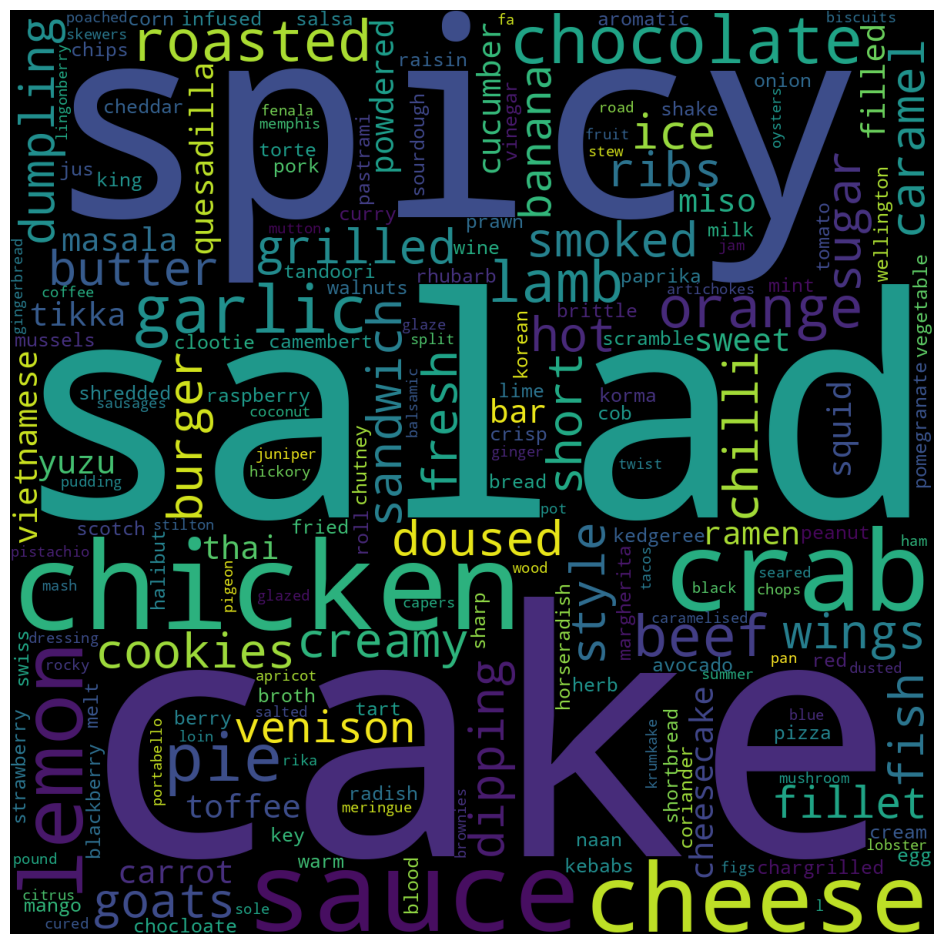

In [9]:
from ast import literal_eval
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join([item.lower() for sublist in [literal_eval(item) for item in df['food_pairing'].values] for item in sublist]), ))
axis('off')

In [10]:
from wordcloud import STOPWORDS
food = dict(Counter(' '.join([item.lower() for sublist in [literal_eval(item) for item in df['food_pairing'].values] for item in sublist]).split()))
food = {key: value for key, value in food.items() if value > 1 and key not in set(STOPWORDS)}
food
bar(data_frame=pd.DataFrame(data={'food': list(food.keys()), 'count': list(food.values())}).sort_values(ascending=False, by='count'),
   x='food', y='count')

(-0.5, 1199.5, 1199.5, -0.5)

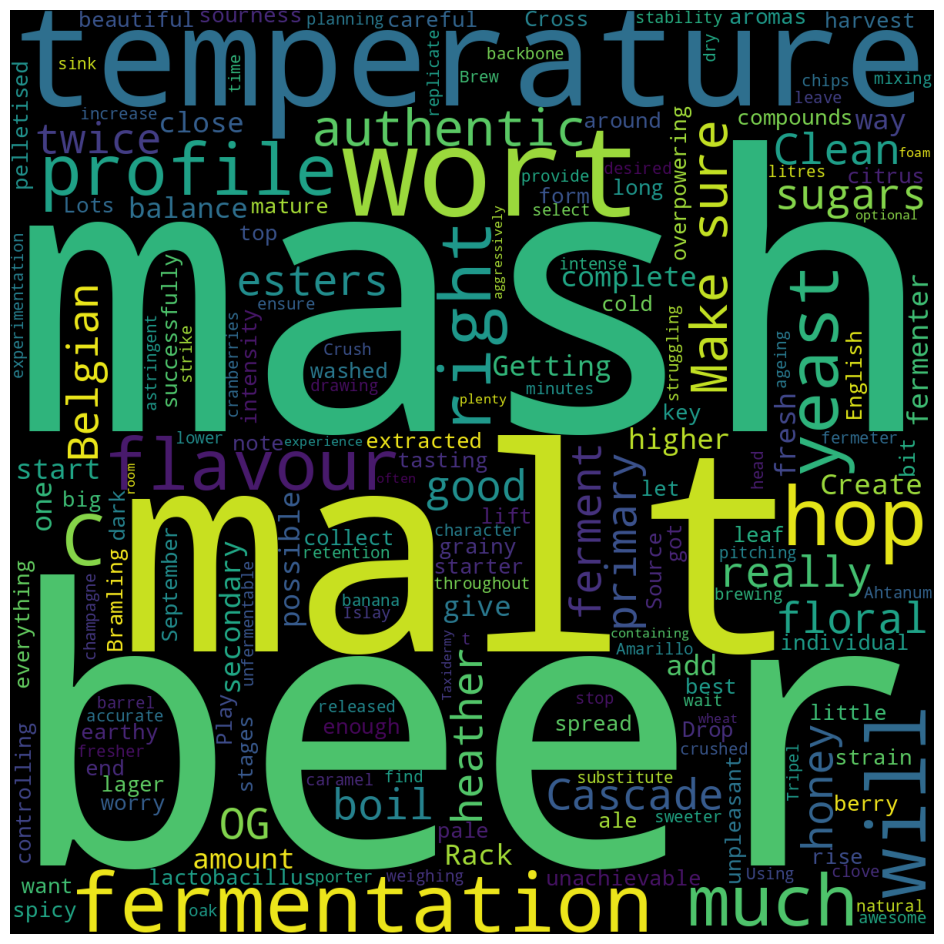

In [11]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['brewers_tips'].values)))
axis('off')